#**SVM FOR BREAST CANCER CLASSIFICATION**

<p align="left">
  <img width="600" height="325" src="https://newsmobile.in/wp-content/uploads/2016/03/breast-cancer.gif">
</p>

Breast cancers can start from different parts of the breast. The breast is an organ that sits on top of the upper ribs and chest muscles. There is a left and right breast and each one has mainly glands, ducts, and fatty tissue. In women, the breast makes and delivers milk to feed newborns and infants. The amount of fatty tissue in the breast determines the size of each breast.

The breast has different parts:

1. Lobules are the glands that make breast milk. Cancers that start here are called lobular cancers.
2. Ducts are small canals that come out from the lobules and carry the milk to the nipple. This is the most common place for breast cancer to start. Cancers that start here are called ductal cancers.
3. The nipple is the opening in the skin of the breast where the ducts come together and turn into larger ducts so the milk can leave the breast. The nipple is surrounded by slightly darker thicker skin called the areola. A less common type of breast cancer called Paget disease of the breast can start in the nipple.
4. The fat and connective tissue (stroma) surround the ducts and lobules and help keep them in place. A less common type of breast cancer called phyllodes tumor can start in the stroma.
5. Blood vessels and lymph vessels are also found in each breast. Angiosarcoma is a less common type of breast cancer that can start in the lining of these vessels. 

**Attribute Information:**
   
1.  ID number 
2.  Diagnosis (M = malignant, B = benign) 

**Ten real-valued features are computed for each cell nucleus:**

1. Radius (mean of distances from center to points on the perimeter) 
2. Texture (standard deviation of gray-scale values) 
3. Perimeter 
4. Area 
5. Smoothness (local variation in radius lengths) 
6. Compactness (perimeter^2 / area - 1.0) 
7. Concavity (severity of concave portions of the contour) 
8. Concave points (number of concave portions of the contour) 
9. Symmetry 
10. Fractal dimension ("coastline approximation" - 1)

# Load the packages and import the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Import Cancer data from the Sklearn library
# Dataset can also be found here (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

#View the data as dataframes

In [ ]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


- mean radius = mean of distances from center to points on the perimeter
- mean texture = standard deviation of gray-scale values
- mean perimeter = mean size of the core tumor
- mean area = 
- mean smoothness = mean of local variation in radius lengths
- mean compactness = mean of perimeter^2 / area - 1.0
- mean concavity = mean of severity of concave portions of the contour
- mean concave points = mean for number of concave portions of the contour
- mean symmetry =
- mean fractal dimension = mean for "coastline approximation" - 1
- radius error = standard error for the mean of distances from center to points on the perimeter
- texture error = standard error for standard deviation of gray-scale values
- perimeter error =
- area error =
- smoothness error = standard error for local variation in radius lengths
- compactness error = standard error for perimeter^2 / area - 1.0
- concavity error = standard error for severity of concave portions of the contour
- concave points error = standard error for number of concave portions of the contour
- symmetry error =
- fractal dimension error = standard error for "coastline approximation" - 1
- worst radius = "worst" or largest mean value for mean of distances from center to points on the perimeter
- worst texture = "worst" or largest mean value for standard deviation of gray-scale values
- worst perimeter =
- worst smoothness = "worst" or largest mean value for local variation in radius lengths
- worst compactness = "worst" or largest mean value for perimeter^2 / area - 1.0
- worst concavity = "worst" or largest mean value for severity of concave portions of the contour
- worst concave points = "worst" or largest mean value for number of concave portions of the contour
- worst fractal dimension = "worst" or largest mean value for "coastline approximation" - 1

In [ ]:
df_cancer.shape

(569, 31)

In [ ]:
df_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

#Visualize the data

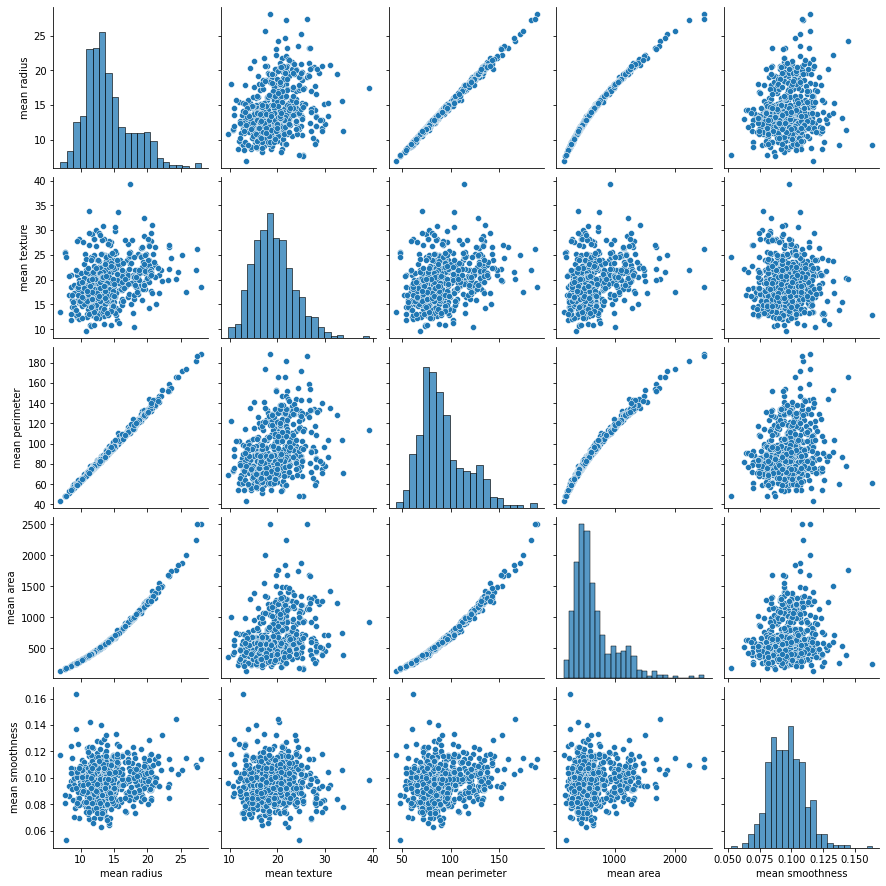

In [ ]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'] )

The above plots shows the relationship between our features. But the only problem with them is that they do not show us which of the "dots" is Malignant and which is Benign. 

This issue will be addressed below by using "target" variable as the "hue" for the plots.

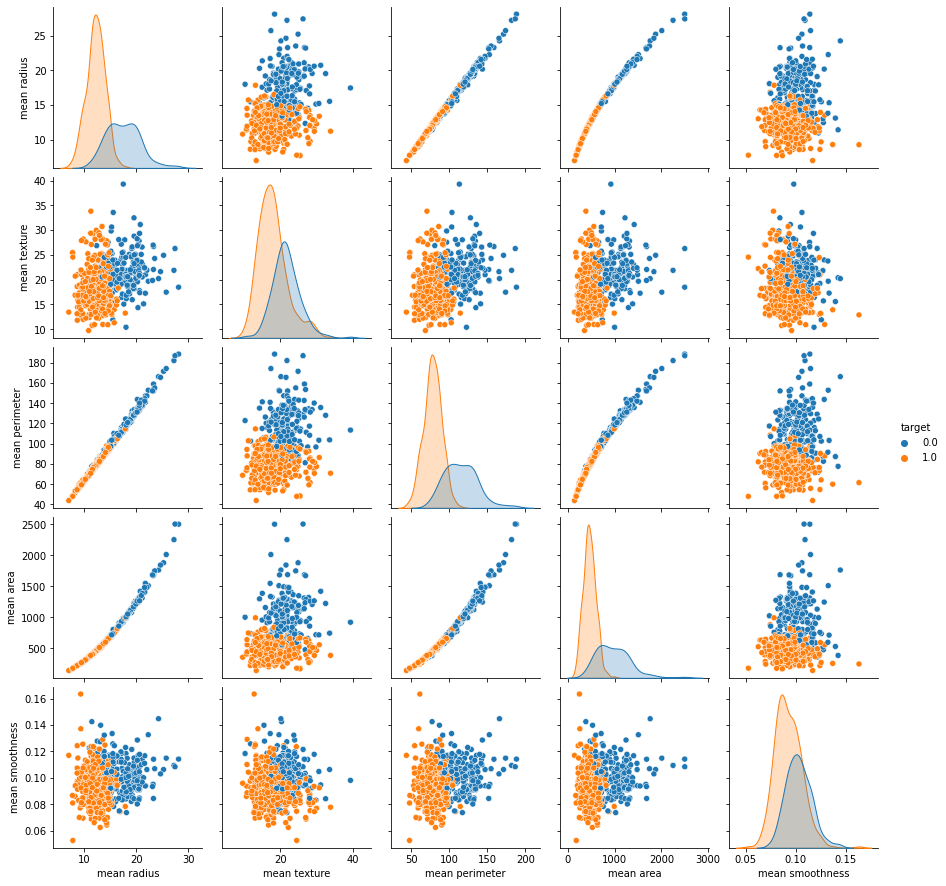

In [ ]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'] )

**DATAPOINTS**
    
  1.0 (Orange) = Benign (No Cancer)
  
  0.0 (Blue) = Malignant (Cancer)

# Count of Benign and Malignant in our dataset

In [ ]:
df_cancer['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


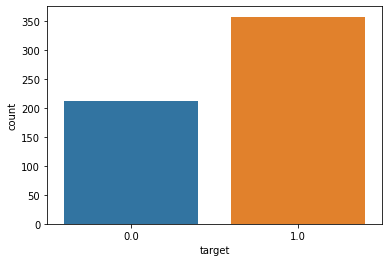

In [ ]:
sns.countplot(df_cancer['target'], label = "Count") 


# Correlation between the extracted features

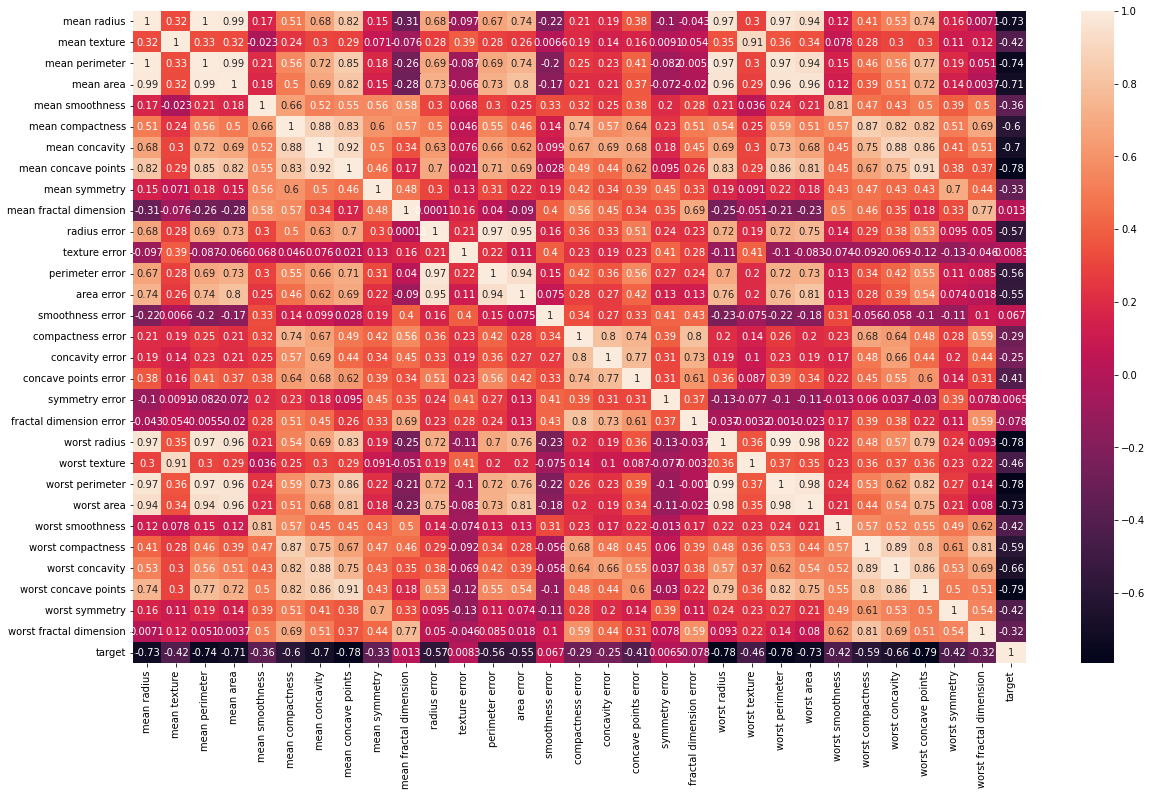

In [ ]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df_cancer.corr(), annot=True) 

**INFERENCE**

There is a strong correlation between the mean radius and mean perimeter, mean area and mean primeter

# NOW WE CAN PROCEED WITH CLASSSIFICATION MODELLING USING SVM

<p align="left">
  <img width="600" height="325" src="https://miro.medium.com/max/1400/1*a46Tz42Epfu3ysFnvWpzWQ.gif">
</p>

An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH).

## **The advantages of support vector machines are:**

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: Different [Kernel](http://scikit-learn.org/stable/modules/svm.html#svm-kernels) functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

# Train the Model

**From our dataset, let's create the target and predictor matrix**

- "y" = Is the feature we are trying to predict (Output). In this case we are trying to predict wheither our "target" is Cancer (Malignant) or not (Benign). I.e. we are going to use the "target" feature here.
- "X" = The predictors which are the remaining columns (mean radius, mean texture, mean perimeter, mean area, mean smoothness, etc)

In [ ]:
X = df_cancer.drop(['target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

# Create the training and testing data

- Training data = Is the subset of our data used to train our model.
- Testing data =  Is the subset of our data that the model hasn't seen before. This is used to test the performance of our model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

Check the size our training and testing data.

In [ ]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (455, 30)


The size of our testing "X" (input features) is (114, 30)


The size of our training "y" (output feature) is (455,)


The size of our testing "y" (output features) is (114,)


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()

# Train the SVM model with the "training" dataset.

In [ ]:
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
y_predict = svc_model.predict(X_test)

## Create the confusion matrix

---

The confusion matrix is a table representing the performance of your model to classify labels correctly.

**A confusion matrix for a binary classification task:**

|   |Predicted Negative | Predicted Positive |   
|---|---|---|
|**Actual Negative**  | True Negative (TN)  | False Positive (FP)  | 
|**Actual Positive** | False Negative (FN)  | True Positive (TP)  |  

In [ ]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,8,40


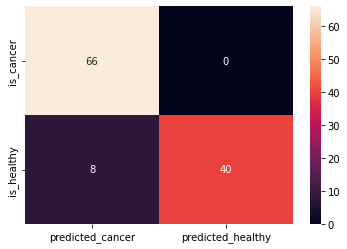

In [ ]:
sns.heatmap(confusion, annot=True)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        48
         1.0       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



# Improving the Model



## Normalize Training Data

In [ ]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [ ]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [ ]:
X_train_range = (X_train_max- X_train_min)
X_train_range

mean radius                  21.129000
mean texture                 28.900000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.043000
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.050000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [ ]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,0.002571,0.181621,0.019648,0.000000,0.129245,0.183916,0.094318,0.097140,0.163618,0.127420,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,0.881948,0.209026,0.843095,1.000000,0.201822,0.386698,0.203409,0.492139,0.127878,0.126556,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,0.033750,0.026498,0.029025,0.019514,0.071897,0.037372,0.017874,0.096174,0.037401,0.027714,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,0.043744,0.281957,0.039533,0.028088,0.125846,0.086055,0.054369,0.224095,0.164744,0.031687,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,0.105667,0.158637,0.101117,0.055618,0.273855,0.217863,0.127551,0.377344,0.308550,0.072800,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


In [ ]:
X_test_min = X_test.min()
X_test_range = (X_test - X_test_min).max()
X_test_scaled = (X_test - X_test_min)/X_test_range

In [ ]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

# SVM with Normalized data

In [ ]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,61,5
is_healthy,0,48


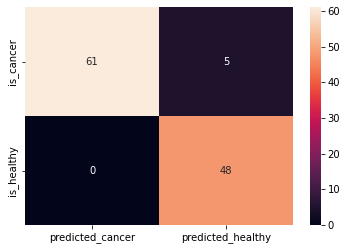

In [ ]:
sns.heatmap(confusion,annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        48
         1.0       1.00      0.92      0.96        66

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



##**The search for the optimal set of hyperparameters is called gridsearching.**

Gridsearching gets its name from the fact that we are searching over a "grid" of parameters. For example, imagine the alpha hyperparameters on the x-axis and fit_intercept on the y-axis, and we need to test all points on the grid.

# Gridsearch Model

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [ ]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.846 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [ ]:
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=10, gamma=0.1)


In [ ]:
grid_predictions = grid.predict(X_test_scaled)

In [ ]:
cm = np.array(confusion_matrix(y_test, grid_predictions, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,63,3
is_healthy,0,48


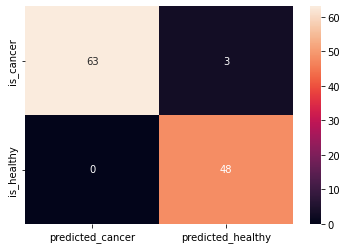

In [ ]:
sns.heatmap(confusion, annot=True)

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        48
         1.0       1.00      0.95      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



**As we can see, the best model is SVM with Normalized data, followed by our Gridsearch model**

#**REFERENCES**
1. https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_support_vector_machine.html
2. https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm
3. http://scikit-learn.org/stable/modules/svm.html